In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#In this dataset, we want to verify if  the user clicked on the ad

In [3]:
ad = pd.read_csv('advertising.csv')

In [4]:
#Verifying data head
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
#Data statistics
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
#Check how  many data points, types and if there is any null data
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


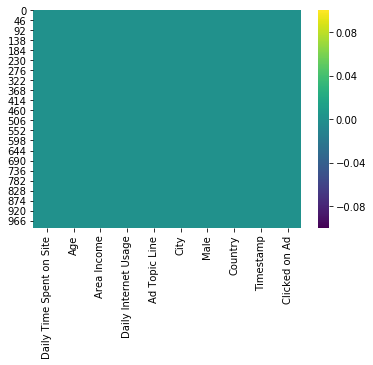

In [7]:
#No null data
sns.heatmap(ad.isnull(), cmap = 'viridis')

## Exploratory Data Analysis

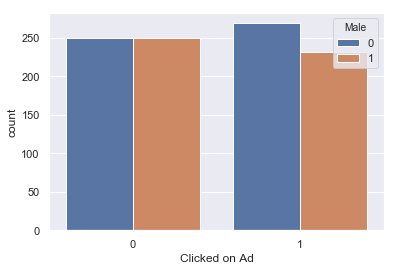

In [8]:
#Number of ads clicked vs non-clicked, and the relation of gender
sns.set()
sns.countplot('Clicked on Ad', data = ad, hue = 'Male')

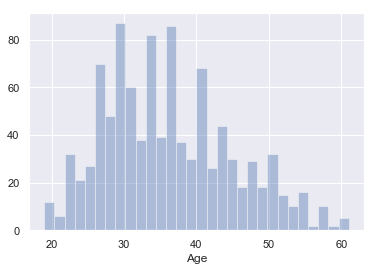

In [9]:
sns.distplot(ad['Age'], bins=30, kde = False)

In [10]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

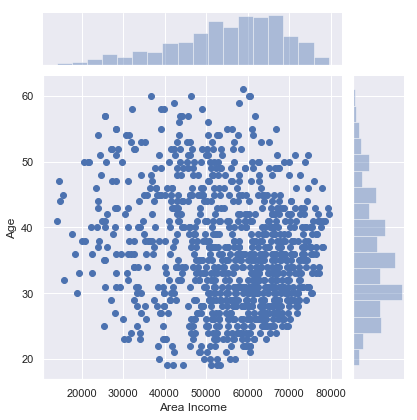

In [11]:
sns.jointplot('Area Income','Age',ad)

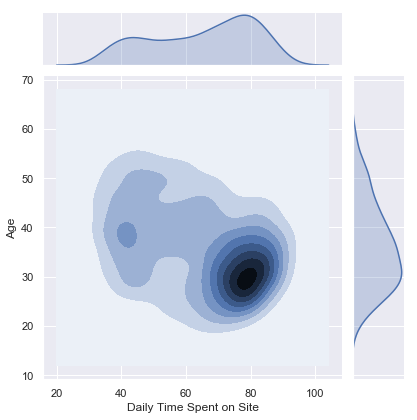

In [12]:
sns.jointplot('Daily Time Spent on Site', 'Age', ad,kind= 'kde')

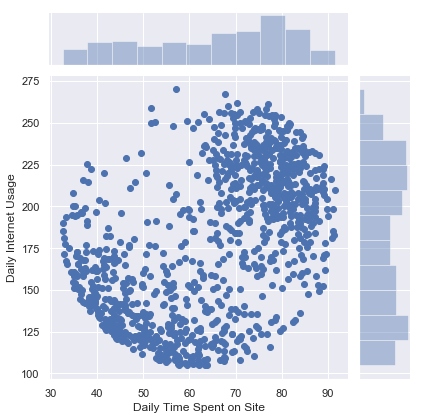

In [13]:
sns.jointplot('Daily Time Spent on Site', 'Daily Internet Usage', ad)

C:\Users\paulo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\paulo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


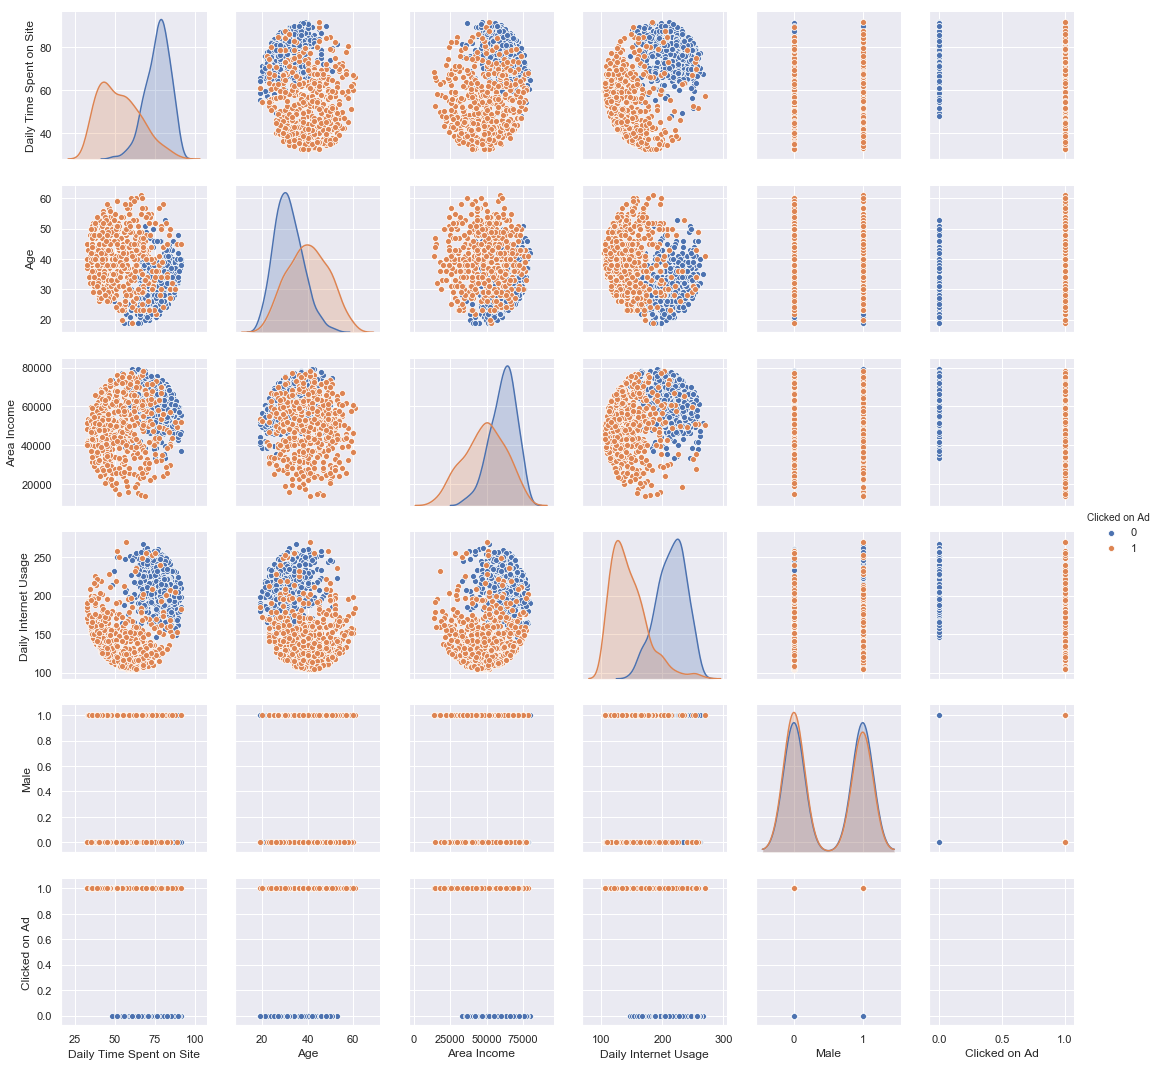

In [14]:
sns.pairplot(ad, hue= 'Clicked on Ad')

## Ajusting  Data

In [15]:
ad['Timestamp'] = pd.to_datetime(ad['Timestamp'])

In [16]:
hour = ad['Timestamp'].apply(lambda x: x.hour)
week = ad['Timestamp'].apply(lambda x: x.dayofweek)


ad['Hour'] = hour
ad['Day Of Week'] = week


In [17]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Day Of Week
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4


In [18]:
ad_cleaned = ad.drop(['Ad Topic Line', 'City', 'Country',  'Timestamp'],axis=1) 

In [19]:
ad_cleaned.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Day Of Week
0,68.95,35,61833.90,256.09,0,0,0,6
1,80.23,31,68441.85,193.77,1,0,1,0
2,69.47,26,59785.94,236.50,0,0,20,6
3,74.15,29,54806.18,245.89,1,0,2,6
4,68.37,35,73889.99,225.58,0,0,3,4


## Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix

In [21]:
X = ad_cleaned.drop('Clicked on Ad', axis = 1)
y = ad_cleaned['Clicked on Ad']

In [22]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3, random_state = 101)

In [23]:
logReg = LogisticRegression()

In [24]:
logReg.fit(X_train,y_train)

C:\Users\paulo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_hat = logReg.predict(X_test)

### Verifying metrics results

In [28]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       157
           1       0.93      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [30]:
print(confusion_matrix(y_test,y_hat))

[[148   9]
 [ 16 127]]
